#### Load Important Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Population and Death Data

In [118]:
# File paths
class_file = 'CLASS.xlsx'
data_file = 'death_population_final_combined.xlsx'

# Read the files
class_df = pd.read_excel(class_file)
data_df = pd.read_excel(data_file)

# Displaying the first few rows of each dataframe to understand the structure
class_df.head()

,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [119]:
data_df.head()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0


In [120]:
# Merging the data on the country code to combine regional information with the yearly data
merged_df = pd.merge(data_df, class_df[['Code', 'Region']], left_on='country_code', right_on='Code', how='left')

# Calculating the mortality rate per 100,000 people for each year and country
merged_df['mortality_rate'] = (merged_df['total_deaths'] / merged_df['population']) * 1000000

# Grouping the data by region and year to create a region-wise dataset
region_yearly_df = merged_df.groupby(['Region', 'year']).agg(
    total_deaths=pd.NamedAgg(column='total_deaths', aggfunc='sum'),
    total_population=pd.NamedAgg(column='population', aggfunc='sum'),
).reset_index()

# Calculating the mortality rate per 100,000 people for each region and year
region_yearly_df['mortality_rate'] = (region_yearly_df['total_deaths'] / region_yearly_df['total_population']) * 100000

# Checking the final grouped dataset
region_yearly_df.head()

,Region,year,total_deaths,total_population,mortality_rate
0,East Asia & Pacific,2001,3094.0,2.043839e+09,0.151382
1,East Asia & Pacific,2002,3277.0,2.061155e+09,0.158989
2,East Asia & Pacific,2003,2730.0,2.077692e+09,0.131396
3,East Asia & Pacific,2004,178682.0,2.093640e+09,8.534512
4,East Asia & Pacific,2005,3198.0,2.109418e+09,0.151606


In [121]:
region_yearly_df.isna().sum()

Region              0
year                0
total_deaths        0
total_population    0
mortality_rate      0
dtype: int64

In [122]:
# Getting the unique income groups
# Getting the unique income groups
region_groups = region_yearly_df['Region'].dropna().unique()
region_groups

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

In [123]:
# Filter the data for Afghanistan
selected_group = 'East Asia & Pacific'
group = region_yearly_df[region_yearly_df['Region'] == selected_group]

group.tail()

,Region,year,total_deaths,total_population,mortality_rate
18,East Asia & Pacific,2019,2769.0,2.329821e+09,0.118850
19,East Asia & Pacific,2020,1751.0,2.339904e+09,0.074832
20,East Asia & Pacific,2021,1800.0,2.346251e+09,0.076718
21,East Asia & Pacific,2022,1662.0,2.351495e+09,0.070678
22,East Asia & Pacific,2023,661.0,2.356765e+09,0.028047


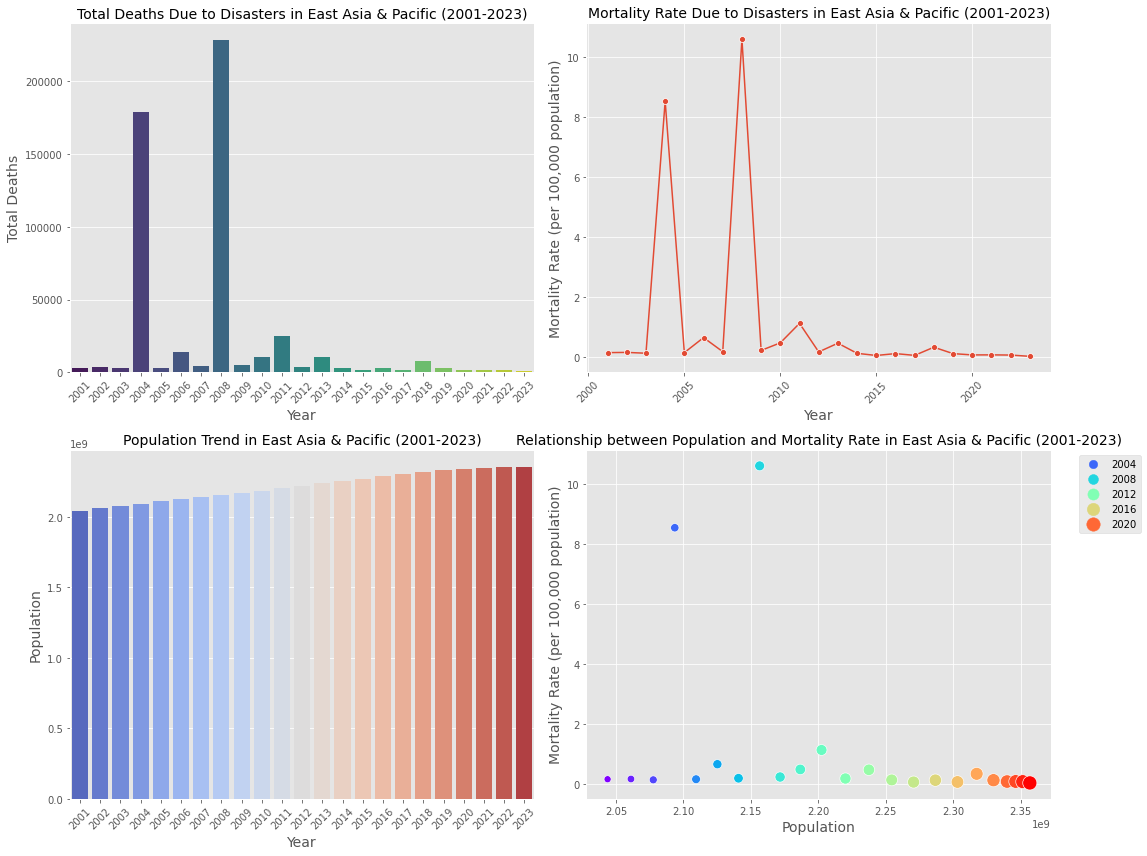

In [124]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=group, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=group, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=group, x='year', y='total_population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=group, x='total_population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [125]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = group[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

# Calculate the median for the entire dataset
# overall_median = prophet_data['y'].median()
# # Replace values in 'y' with this median
# prophet_data.loc[prophet_data['ds'].dt.year == 2022, 'y'] = overall_median

# Filter out the year 2004 from historical data
#prophet_data = prophet_data[~prophet_data['ds'].dt.year.isin([2004])]
# Assuming your DataFrame is named 'prophet_data' and the target column is 'y'
#prophet_data['y'] = prophet_data['y'].replace(0, 0.1)
prophet_data.tail()

,ds,y
18,2019-12-31,0.118850
19,2020-12-31,0.074832
20,2021-12-31,0.076718
21,2022-12-31,0.070678
22,2023-12-31,0.028047


For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

14:35:38 - cmdstanpy - INFO - Chain [1] start processing
14:35:38 - cmdstanpy - INFO - Chain [1] done processing


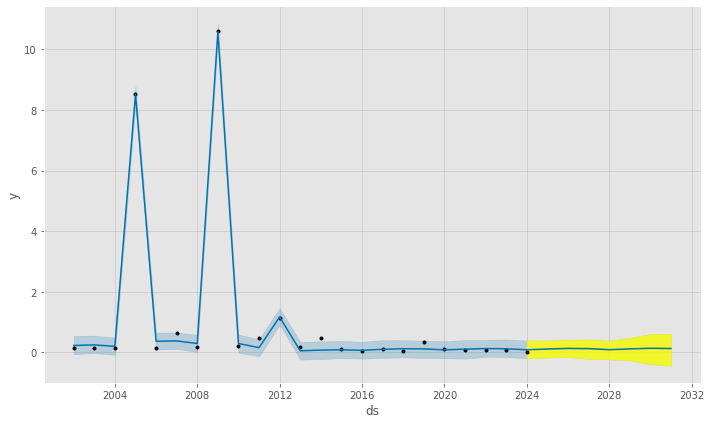

In [126]:
# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2004-12-31', '2008-12-31', '2011-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    changepoint_prior_scale=0.08,
    seasonality_prior_scale=150,
    #holidays_prior_scale=100,
    mcmc_samples=0
)
# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=12)  # Replace `N` with the desired number of Fourier terms

model.fit(prophet_data)
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=7, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)

# Highlight the prediction (2023-2025) with a different color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8)

#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

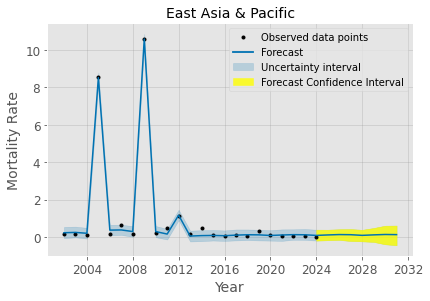

In [127]:
# Plot the forecast
#forecast =forecast[forecast['ds'].dt.year > 2004]
fig = model.plot(forecast, figsize=(6, 4), uncertainty=True)

# Highlight the prediction (2024-2030) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
ax.tick_params(axis='both', labelsize=12)  # Adjust labelsize as needed
ax.set_xlabel('Year', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=14)  # Set the Y-axis label
ax.set_title(f'{selected_group}', fontsize=14)  # Set the title
#ax.set_ylim(-1, 2)

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.8)  # Set the linewidth of the legend lines
plt.show()
# Save the figure
fig.savefig(f'mortality_rate_forecast_{selected_group}.pdf', format='pdf', bbox_inches='tight')
fig.savefig(f'mortality_rate_forecast_{selected_group}.png', format='png', dpi=600, bbox_inches='tight')

In [128]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

           ds      yhat  yhat_lower  yhat_upper
23 2024-12-31  0.112013   -0.169732    0.389997
24 2025-12-31  0.131818   -0.152734    0.415124
25 2026-12-31  0.124647   -0.210917    0.424185
26 2027-12-31  0.089807   -0.229530    0.384387
27 2028-12-31  0.115866   -0.259774    0.481385
28 2029-12-31  0.136314   -0.385909    0.603900
29 2030-12-31  0.128863   -0.438362    0.610906


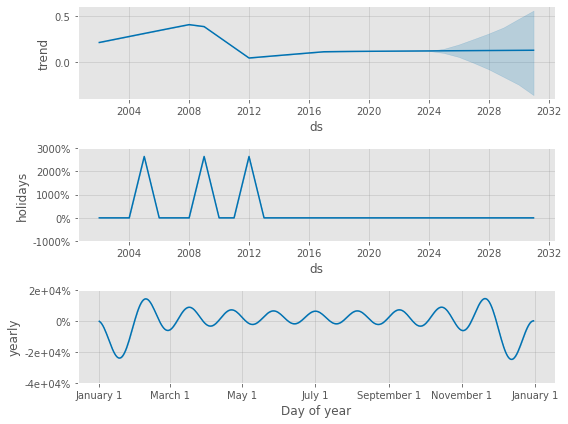

In [129]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast, figsize=(8, 6))

In [130]:
# Adjust the last 7 'yhat_lower' entries to zero if they are negative and calculate the means for those entries
forecast.loc[forecast.index[-7:], 'yhat_lower'] = forecast['yhat_lower'][-7:].apply(lambda x: max(x, 0))

# Now calculate the mean of the 'yhat_lower' and 'yhat_upper' for the last 7 entries
mean_lower_last_7 = forecast['yhat_lower'][-7:].mean()
mean_upper_last_7 = forecast['yhat_upper'][-7:].mean()

mean_lower_last_7, mean_upper_last_7

(0.0, 0.472840644009893)

In [131]:
# Print the forecast
print(forecast[['yhat']].tail(7))

        yhat
23  0.112013
24  0.131818
25  0.124647
26  0.089807
27  0.115866
28  0.136314
29  0.128863


#### BenchMark Strategy 1

In [132]:
# Calculate historical mean
historical_mean = group['mortality_rate'].mean()
print(f"Historical Mean Mortality Rate: {historical_mean}")

# Selecting only the years 2024 to 2030 for the calculation
forecast_data = forecast[(forecast['ds'] >= "2024-12-31") & (forecast['ds'] <= "2030-12-31")]

# Calculate forecast mean
forecast_mean = forecast_data['yhat'].mean()
print(f"Forecast Mean Mortality Rate: {forecast_mean}")

# Check for reduction
reduction_25 = historical_mean * 0.75
reduction_50 = historical_mean * 0.50

print(f"25% Reduction Threshold: {reduction_25}")
print(f"50% Reduction Threshold: {reduction_50}")

# Check for 25% Reduction
if forecast_mean <= reduction_25:
    print("Yes:25% reduction")
else:
    print("No: 25% reduction")

# Check for 50% Reduction
if forecast_mean <= reduction_50:
    print("Yes:50% reduction")
else:
    print("No: 50% reduction")


Historical Mean Mortality Rate: 1.0477286825678842
Forecast Mean Mortality Rate: 0.11990392699267852
25% Reduction Threshold: 0.7857965119259132
50% Reduction Threshold: 0.5238643412839421
Yes:25% reduction
Yes:50% reduction
